# Greenland Ice Velocity Data

## Leverett Transect

- Data source and documentation: https://ramadda.data.bas.ac.uk/repository/entry/show/Polar+Data+Centre/NERC+Grants/Ice+motion+measurements%2C+south-west+Greenland+Ice+Sheet+%28verson+2%29?entryid=1f69fba3-4c62-47ad-8119-08cfeec05e46
- Contact: Andrew Tedstone (a.j.tedstone@bristol.ac.uk)
- **Important note:** When I downloaded this data from the repository listed above in March 2018, there were data quality issues with the ice velocity data, due to some processing error when the HDF file was generated. Instead, I had to use ice velocities from Matlab `.mat` files, sent by Andrew Tedstone. See `Leverett Emails.pdf` for more details. Other measurements (temperature, etc.) I obtained from the HDF file in the online repository.

#### Measurements:
- Ice velocities from dual-frequency GPS receivers
  - `v_6h` are continuous velocities computed with a 6-hour sliding differencing window
  - `v_24h` are daily velocities obtained by differencing across 24-hour periods
- Near-surface air temperatures
- Net seasonal ablation using ablation stakes
- Melt rates using sonic ranging sensors at selected sites

#### Data Processing
- Data processing scripts are in: https://github.com/jenfly/greenland/tree/master/scripts/lev_transect
- Ice velocities are from the `.mat` files as noted above
- Processed data is in the `processed` folder:
  - Daily ice velocities (m/year) - from `v_24h` and daily means of `v_6h` (the values are very similar and either can be used)

---

## K-Transect

- Data source: https://www.the-cryosphere.net/9/603/2015/tc-9-603-2015-supplement.zip
- Documentation: Van de Wal et al. (2015) https://www.the-cryosphere.net/9/603/2015/
- Contact: Roderik van de Wal (R.S.W.vandeWal@uu.nl)

#### Measurements
- Ice velocities from single-frequency GPS receivers
  - Velocities are at hourly resolution, but are calculated from GPS positions spaced 168 hours (1 week) apart, as described in Van de Wal et al. (2015) and Den Ouden et al. (2010) reference cited within
- Hourly ablation from energy balance calculations with weather station data (stations S5, S6, and S9)

#### Data Processing
- Due to many inconsistencies in data formatting (date/times, decimal conventions, etc.), the downloaded data (in the `raw` folder) was pre-processed manually within an Excel spreadsheet to standardize the data and extract into CSV files (spreadsheet and CSV files are in the `intermed` folder)
- Final processing to consolidate the data was done with a Python script (https://github.com/jenfly/greenland/tree/master/scripts/k_transect)
  - Some quality issues remained with station S6 velocity data (see `K-Transect Emails.pdf`) - unrealistically high velocity values have been set to `NaN` in the script
- Processed data is in the `processed` folder:
  - Hourly and daily mean ice velocities (m/year)
  - Daily ablation (cm w.e.)

#### Notes
- Coordinates and elevations for stations S5, S6, and S9 listed in `metadata/k_coords.csv` were taken from Table 1 of D. van As et al. (2012) https://www.the-cryosphere.net/6/199/2012/. Coordinates for the other stations were not provided in the downloaded data or in the Van de Wal et al. (2015) paper and would need to be obtained from the author.

---

## Maps

Overview map showing various stations (rectangle shows Leverett / K-transect region):

![](img/stations_map.png)

Map of Leverett stations and K-transect stations (S5, S6, S9 only):

![](img/leverett_ktransect_map.png)

Map showing all K-transect stations (Fig. 1 of Van de Wal et al. 2015):

![](img/k_transect_map.PNG)

## Data Summaries

### Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
# Leverett velocities
v_lev = pd.read_csv('../data/lev_transect/processed/lev_v_6h_daily.csv', index_col=0, parse_dates=True)
v_lev.head(3)

,lev0,lev1,lev2,lev3,lev4,lev5,lev6,lev7,lev8
time,,,,,,,,,
2009-05-07,NaN,134.083797,100.471590,121.522337,136.211869,99.351418,65.974193,NaN,NaN
2009-05-08,69.331872,105.142612,104.555451,122.899363,113.655930,90.287098,67.156487,NaN,NaN
2009-05-09,62.942452,106.891238,103.828276,122.884976,112.263387,87.957282,52.804915,NaN,NaN


In [4]:
# K-Transect velocities
datadir_k = '../data/k_transect/processed/'
v_k = pd.read_csv(datadir_k + 'k-transect-velocities-daily.csv', index_col=0, parse_dates=True)
v_k.head(3)

,S4,S5,SHR,S6,S7,S8,S9,S10
Date,,,,,,,,
2005-08-28,NaN,NaN,NaN,NaN,77.262000,NaN,NaN,NaN
2005-08-29,NaN,86.728556,103.854000,47.578136,73.011833,58.272500,NaN,NaN
2005-08-30,106.272381,82.153667,102.166083,47.022000,63.402792,55.266667,NaN,NaN


In [5]:
# K-Transect ablation
ab_k = pd.read_csv(datadir_k + 'k-transect-ablation-daily.csv', index_col=0, parse_dates=True)
ab_k.head(3)

,S5,S6,S9
2003-08-30,4.96,2.35,1.64
2003-08-31,3.48,1.54,1.06
2003-09-01,2.56,2.10,0.00


In [6]:
# Merge velocities into a single dataframe

v_merged = v_lev.join(v_k, how='outer')
v_merged.head(3)

,lev0,lev1,lev2,lev3,lev4,lev5,lev6,lev7,lev8,S4,S5,SHR,S6,S7,S8,S9,S10
2005-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.262000,NaN,NaN,NaN
2005-08-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.728556,103.854000,47.578136,73.011833,58.272500,NaN,NaN
2005-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.272381,82.153667,102.166083,47.022000,63.402792,55.266667,NaN,NaN


### Leverett Velocities

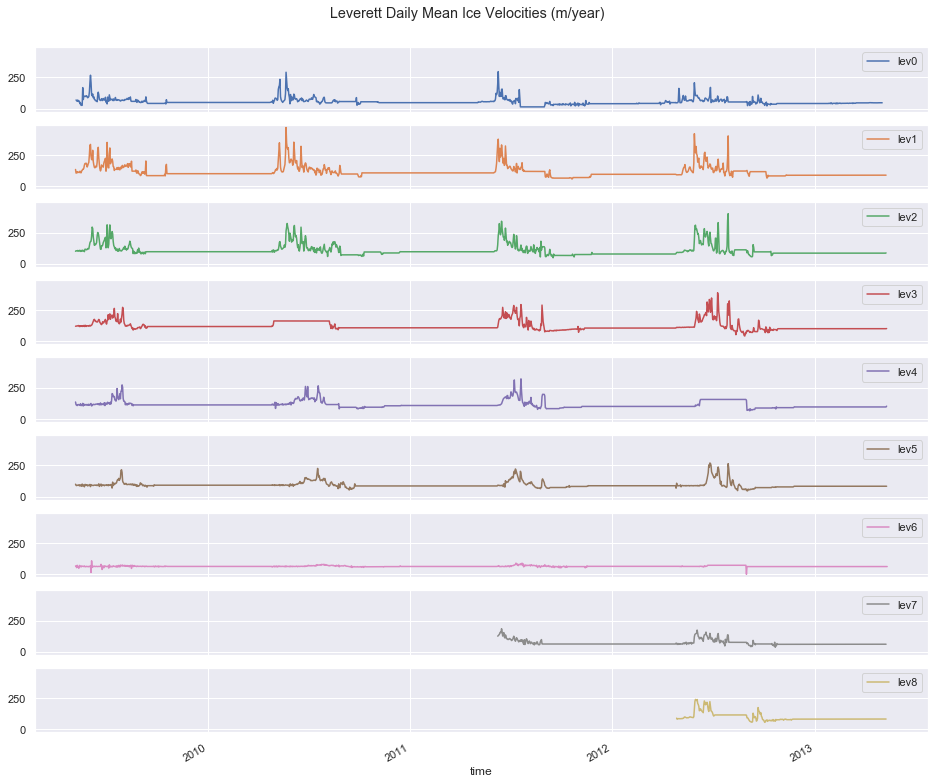

In [7]:
v_lev.plot(figsize=(16, 14), subplots=True, sharex=True, sharey=True)
plt.suptitle('Leverett Daily Mean Ice Velocities (m/year)', y=0.92);

### K-Transect Velocities and Ablation

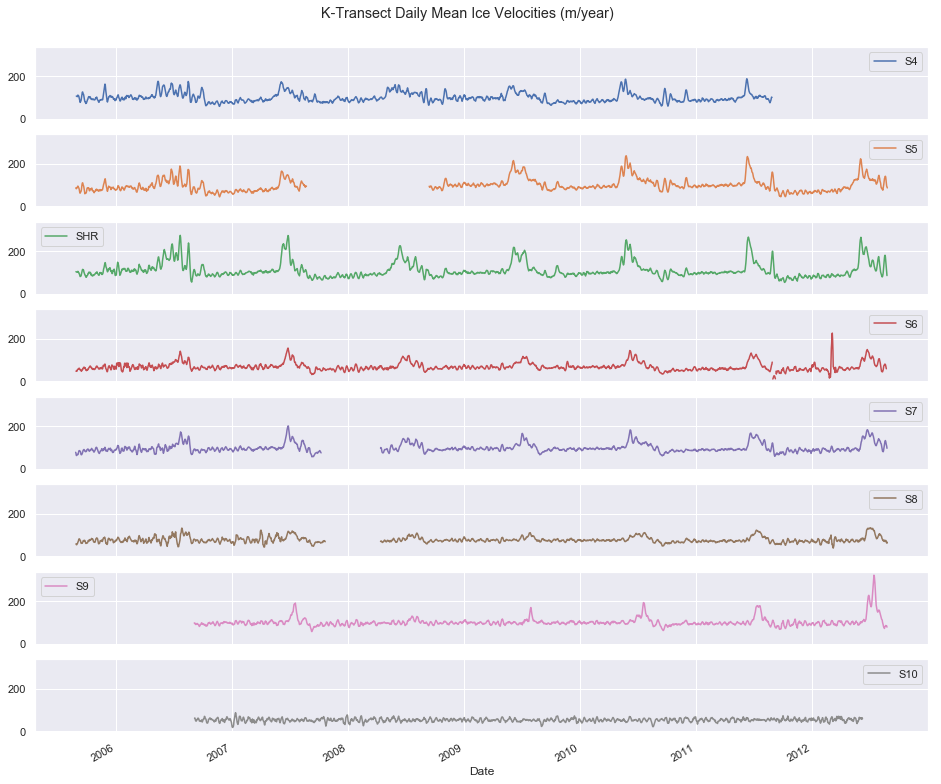

In [8]:
v_k.plot(figsize=(16, 14), subplots=True, sharex=True, sharey=True)
plt.suptitle('K-Transect Daily Mean Ice Velocities (m/year)', y=0.92);

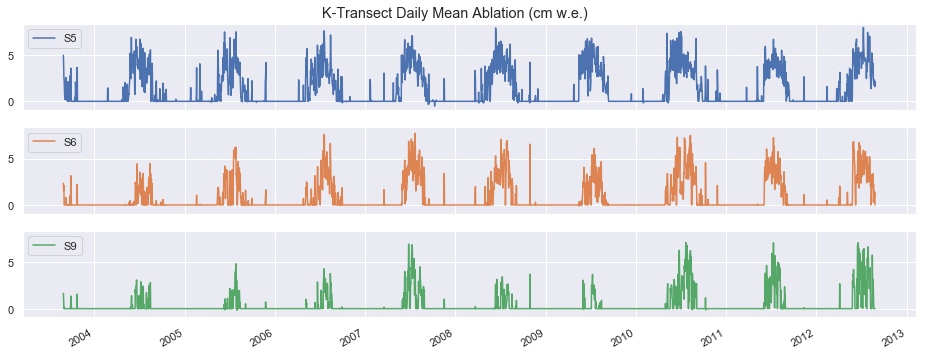

In [9]:
ab_k.plot(figsize=(16, 6), subplots=True, sharex=True, sharey=True)
plt.suptitle('K-Transect Daily Mean Ablation (cm w.e.)', y=0.92);

### Comparison of Velocities

Compare ice velocities for several Leverett and K-Transect stations which are in close proximity to each other, and plot along with ablation from K-Transect station.

In [10]:
dashes = 4, 1
styles = {'lev1' : {'color' : 'C0'}, 
          'lev2' : {'color' : 'C0', 'linewidth' : 0.5},
          'S5' : {'color' : 'C3'},
          'SHR' : {'color' : 'C3', 'linewidth' : 0.5},
          }

In [11]:
def plot_timeseries(df, start, end, columns=None, styles=None, ax=None, legend=True, legend_kw={}):
    if ax is not None:
        plt.sca(ax)
    if columns is None:
        columns = df.columns
    df_plot = df.loc[start:end, columns]
    for col in df_plot.columns:
        if styles is None:
            style = {}
        else:
            style = styles[col]
        plt.plot(df_plot.index, df_plot[col], label=col, **style)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    if legend:
        plt.legend(**legend_kw)

In [12]:
def plot_velocity_ablation(v_merged, stns_v, stns_ab, year, figsize=(12, 6)):
    legend_kw = {'loc' : 'upper right'}

    fig, axes = plt.subplots(2, 1, figsize=figsize, sharex=True)
    plt.suptitle(f'April-October {year} Daily Ice Velocities and Ablation', y=0.92, fontweight='bold')
    start, end = '%d-04-01' % year, '%d-10-31' % year

    plot_timeseries(v_merged, start, end, ax=axes[0], columns=stns_v, styles=styles, legend_kw=legend_kw)
    axes[0].set_title(f'Ice Velocities', position=(0.02, 0.85), ha='left')
    axes[0].set_ylabel('m/year')

    ab_plot = ab_k.loc[start:end, stns_ab]
    for stn in stns_ab:
        axes[1].plot(ab_plot.index, ab_plot[stn], color='0.3', label=stn)    
    axes[1].set_xlim(pd.Timestamp(start), pd.Timestamp(end))
    axes[1].set_ylabel('cm w.e.')
    axes[1].set_title('Ablation', position=(0.02, 0.85), ha='left')
    axes[1].legend(**legend_kw)
    
    return axes

In [13]:
# Group of stations in close proximity to each other
stns_v = ['lev1', 'lev2', 'S5', 'SHR']
stns_ab = ['S5']

# Overlapping years for these stations
years = range(2009, 2013)

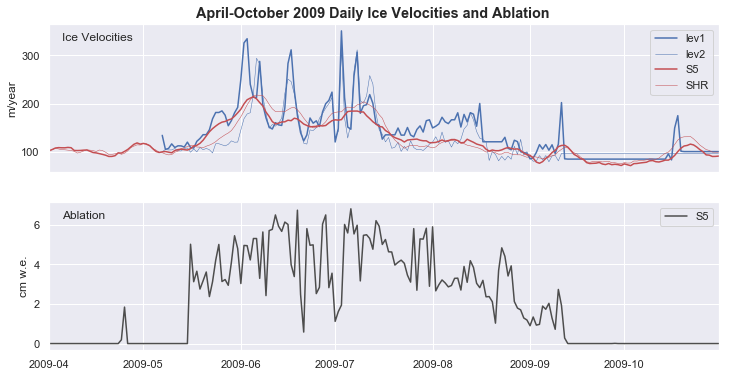

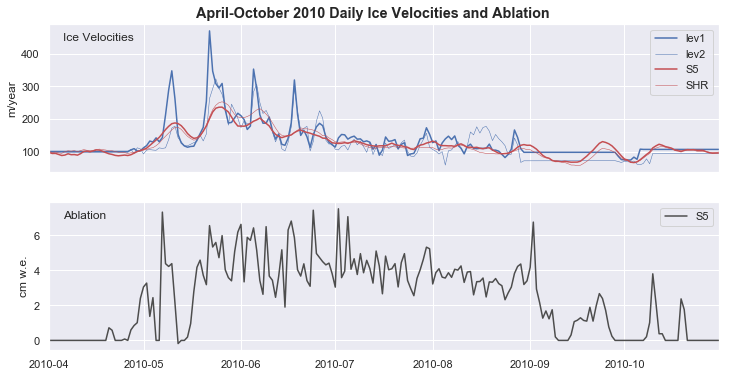

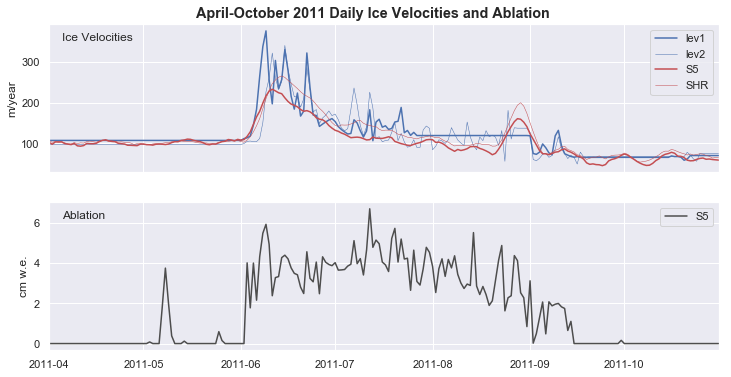

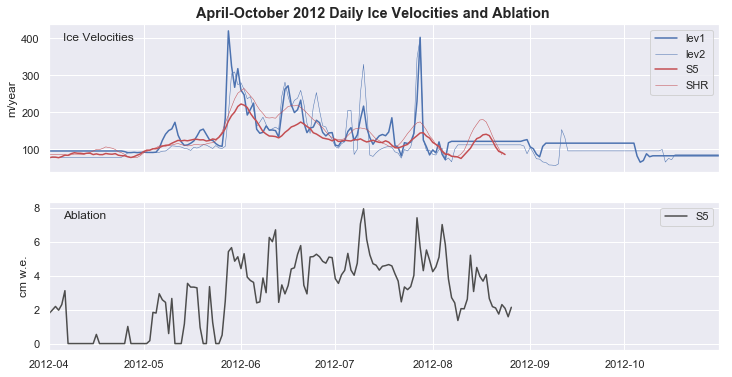

In [14]:
for year in years:
    plot_velocity_ablation(v_merged, stns_v, stns_ab, year)